In [17]:
!pip install tensorflow


In [76]:
import tensorflow as tf
from tensorflow import keras

In [77]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [78]:
df=keras.datasets.mnist.load_data()

In [79]:
len(x_train)

60000

In [80]:
df=list(df)
type(df)

list

In [81]:
import pandas as pd
dff=pd.DataFrame(df)

In [82]:
x_train.shape

(60000, 28, 28)

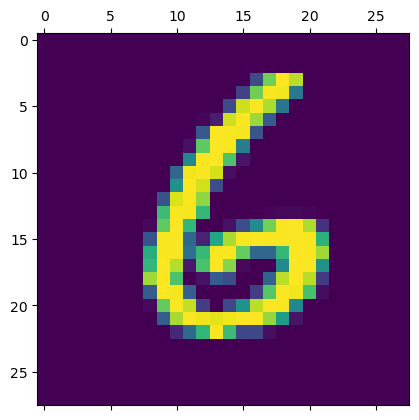

In [83]:
import matplotlib.pyplot as plt
plt.matshow(x_train[6000])

In [84]:
y_train[6000]

6

In [85]:
x_train_f=x_train.reshape(len(x_train),28*28)

In [86]:
x_train_f.shape,y_train.shape

((60000, 784), (60000,))

In [87]:
x_train_f[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [90]:
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_f,y_train,epochs=5)

Epoch 1/5


1875/1875 [==============================] - 7s 3ms/step - loss: 9.9987 - accuracy: 0.8358
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 6.1005 - accuracy: 0.8774
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.7472 - accuracy: 0.8821
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 5.4618 - accuracy: 0.8866
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 5.3420 - accuracy: 0.8871


In [91]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [92]:
x_test_f=x_test.reshape(len(x_test),28*28)

In [94]:
x_train_f.shape,x_test_f.shape

((60000, 784), (10000, 784))

In [95]:
train_x=x_train_f/255
test_x=x_test_f/255

In [104]:
model1=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])
model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
model1.fit(train_x,y_train,epochs=5)



Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4623 - accuracy: 0.8798
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3031 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2829 - accuracy: 0.9207
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2727 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2665 - accuracy: 0.9259


In [105]:
model1.evaluate(test_x,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.2654 - accuracy: 0.9256


[0.26539158821105957, 0.925599992275238]

In [107]:
y_pred=model1.predict(test_x)

313/313 [==============================] - 1s 3ms/step


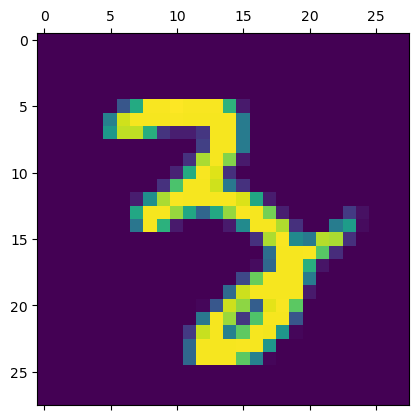

In [118]:
plt.matshow(x_test[87])

In [111]:
y_pred[90]

array([6.6513643e-02, 3.2671283e-03, 3.0241109e-02, 9.9901098e-01,
       2.9594611e-04, 7.2603935e-01, 2.7908689e-07, 3.0317599e-02,
       4.8488304e-01, 1.2589902e-01], dtype=float32)

In [117]:
import numpy as np
np.argmax(y_pred[87])

3

In [119]:
y_pred[9]

array([1.3320886e-04, 4.3440910e-08, 1.1763186e-05, 2.9646599e-04,
       8.4529293e-01, 2.6935937e-03, 2.6509068e-05, 8.6922187e-01,
       3.0718297e-01, 9.9513417e-01], dtype=float32)

In [124]:
y_test[3]

0

In [122]:
y_predicted=[np.argmax(i) for i in y_pred]

In [125]:
y_predicted[3]

0

In [130]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 963,    0,    1,    2,    0,    4,    6,    1,    3,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [   7,   12,  918,   14,    8,    3,   12,   10,   44,    4],
       [   4,    0,   22,  913,    0,   25,    2,   11,   25,    8],
       [   1,    1,    6,    1,  913,    0,   10,    3,   10,   37],
       [  10,    3,    2,   27,    7,  783,   15,    5,   33,    7],
       [  13,    3,    5,    1,    7,    9,  915,    2,    3,    0],
       [   3,    7,   22,    6,   10,    1,    0,  937,    3,   39],
       [   7,   11,    5,   16,    9,   21,    9,   10,  880,    6],
       [  10,    7,    1,    9,   29,    6,    0,   19,    9,  919]])>

Text(50.722222222222214, 0.5, 'Truth')

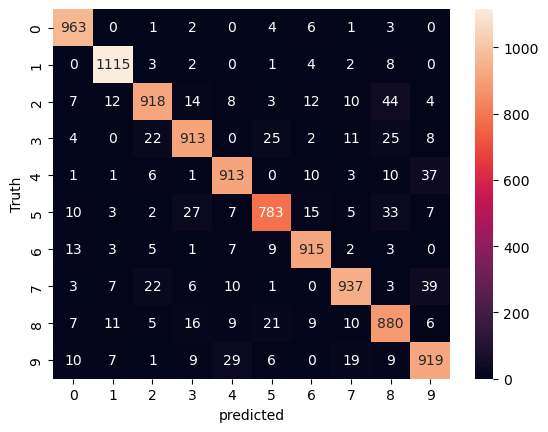

In [135]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [138]:
model1=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')#Hidden layer
])
model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
model1.fit(train_x,y_train,epochs=5)



Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2814 - accuracy: 0.9203
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1300 - accuracy: 0.9621
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0913 - accuracy: 0.9725
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0689 - accuracy: 0.9789
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0550 - accuracy: 0.9824


In [140]:
model1.evaluate(test_x,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0834 - accuracy: 0.9752


[0.0833996832370758, 0.9751999974250793]